In [1]:
!jupyter nbconvert --to html Project1_ChurnAnalyticsPrediction.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot trust

Jupyter command `jupyter-nbconvert` not found.


# Churn Analytics

In [2]:
# Import all the necessory libraries
import numpy as np                     # linear algebra
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt        #visualization
%matplotlib inline

import seaborn as sns                  #visualization
import plotly.offline as py            #visualization
import plotly.graph_objs as go         #visualization
import warnings
warnings.filterwarnings("ignore")

## Data Import

In [3]:
# import the e-commerce data
df = pd.read_csv("E-Commerce Churn Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'E-Commerce Churn Data.csv'

## Data Overview
- Check out the data

- What you are looking for?
    - look for missing values
    - look for abnormalities
    - Do you need to parse the data?
    - Do you need to change the column name?
    - Do you need to standardize data?
    - Is there any data conflicts you need to change or remove?

In [ ]:
# data overview
df.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4.0,NaN,NaN,0.0,0.0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone
CityTier,3,1,1,3,1
WarehouseToHome,6.0,8.0,30.0,15.0,12.0
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC
Gender,Female,Male,Male,Male,Male
HourSpendOnApp,3.0,3.0,2.0,2.0,NaN
NumberOfDeviceRegistered,3,4,4,4,3


In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# check for the missing values
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
# after looking at the data, we have found that there are spaces instad of missing value
# replacing " " or any missing values with np.NaN
df = df.replace("  ", np.NaN)

In [ ]:
# check for the missing values
df.isna().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


## Data Cleaning

- Clean data based on data overview

`After the data overview, we can conclude that the missing data makes up around 5% of the total data, which is enough to need attention.The plan is to replace the missing values with the mode (the most frequent value in each column).By using the mode, we fill in the gaps without changing the overall balance of the data too much.`

`This code reads an e-commerce dataset, checks for missing values (including those represented by spaces), replaces them with NaN, and prepares for handling missing data by using mode imputation.`

In [ ]:
#Replacing NaN values with the mode of the referred column
for i in df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

#convert to int type
df[["Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder"]] = df[["Tenure",
                                "WarehouseToHome",
                                "HourSpendOnApp",
                                "OrderAmountHikeFromlastYear",
                                "CouponUsed",
                                "OrderCount",
                                "DaySinceLastOrder"]].astype("Int64")

#convert to float type
df["CashbackAmount"] = df["CashbackAmount"].astype(float)

- replace the values if needed

In [ ]:
df.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4,1,1,0,0
PreferredLoginDevice,Mobile Phone,Phone,Phone,Phone,Phone
CityTier,3,1,1,3,1
WarehouseToHome,6,8,30,15,12
PreferredPaymentMode,Debit Card,UPI,Debit Card,Debit Card,CC
Gender,Female,Male,Male,Male,Male
HourSpendOnApp,3,3,2,2,3
NumberOfDeviceRegistered,3,4,4,4,3


In [ ]:
#Taking out unnecessary words
for i in df.columns:
    if i[:9] == "Preferred":
        df.rename({i:i[9:]}, axis=1, inplace=True)
    elif i[:8] == "Prefered":
        df.rename({i:i[8:]}, axis=1, inplace=True)

In [ ]:
# normalizing duplicates

df.replace(to_replace="CC", value="Credit Card", inplace=True)
df.replace(to_replace="COD", value="Cash on Delivery", inplace=True)
df.replace(to_replace=["Mobile Phone", "Mobile"], value="Phone", inplace=True)


In [ ]:
# saparting tenure into categories in order to group the customers
# Convert Tenure to categorical column
def tenure_lab(df) :

    if df["Tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["Tenure"] > 12) & (df["Tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["Tenure"] > 24) & (df["Tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["Tenure"] > 48) & (df["Tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["Tenure"] > 60 :
        return "Tenure_gt_60"

df["tenure_group"] = df.apply(lambda df:tenure_lab(df), axis = 1)

In [ ]:
#check the final data
df.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4,1,1,0,0
LoginDevice,Phone,Phone,Phone,Phone,Phone
CityTier,3,1,1,3,1
WarehouseToHome,6,8,30,15,12
PaymentMode,Debit Card,UPI,Debit Card,Debit Card,Credit Card
Gender,Female,Male,Male,Male,Male
HourSpendOnApp,3,3,2,2,3
NumberOfDeviceRegistered,3,4,4,4,3


In [ ]:
#df.to_csv(r'G:\My Drive\Data Analytics for Business\Term 3 - 2024 Fall\DAB303 - Marketing Analytics\Project 1 - Churn Analytics\Cleaned_ChurnData.csv', index=False)

## Summary of Above code:

1.Fill Missing Values: Replace missing values with the most common value in each column.

2.Fix Data Types: Convert specific columns to integers or floats for accuracy in calculations.

3.Clean Column Names: Simplify column names by removing unnecessary prefixes.

4.Standardize Values: Ensure similar values across rows are consistent and readable.

5.Categorize Customers: Group customers based on tenure to make customer analysis more meaningful.

# Exploratory Analysis

- Create plots which make sense and helps to answer business question.

- hint:
     - Always make sure that you are inclunding few plots with variable of intrest.

### Plot 1

In [ ]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

print(lab)
print(val)

[0, 1]
[4682, 948]


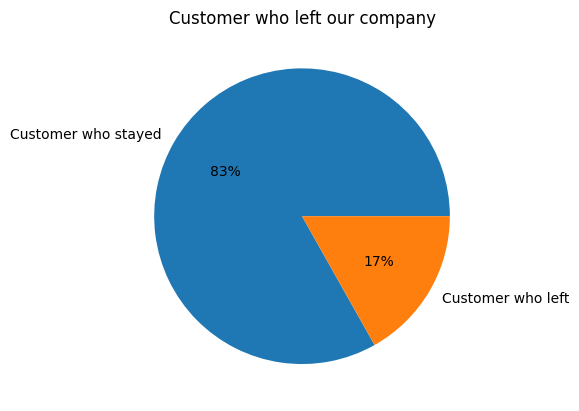

In [ ]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

#changing labels which is more readable for stakeholders
lab = ['Customer who stayed', 'Customer who left']

# define Seaborn color palette to use
palette_color = sns.color_palette('tab10')

# plotting data on chart
plt.pie(val, labels=lab, colors=palette_color, autopct='%.0f%%')
plt.title('Customer who left our company')

# displaying chart
plt.show()

In [ ]:
# Write your Analysis Statement / Insights for the Plot 1


Analysis for the Plot:

High Customer Retention: The pie chart shows that a significant majority of customers stayed with the company. This is a positive sign, indicating that customer satisfaction, loyalty, or the value proposition of the company is strong.

Low Churn Rate: Since the percentage of customers who left is relatively small, the company seems to be successfully retaining most of its customers. This could be attributed to good customer service, competitive pricing, or an overall positive customer experience.

Opportunities for Growth: Although the churn rate is low, it’s still important to analyze the reasons why the small percentage of customers left. This could highlight areas of potential improvement to reduce churn even further.

Focus on Customer Retention Strategies: Continue to prioritize retention strategies, as keeping existing customers is often more cost-effective than acquiring new ones. Loyalty programs, personalized offers, or proactive customer service could further strengthen retention.

Strategic Communication with Stakeholders: This high retention rate is a great achievement and should be communicated to stakeholders as a success. It shows that current strategies are working well, but there’s always room for fine-tuning and preventing any increase in churn.

#### Plot 2

<Axes: xlabel='Churn', ylabel='Count'>

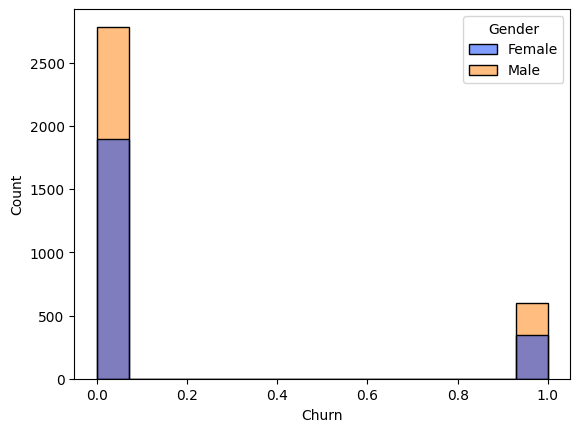

In [ ]:
# Check out gender distribution with customer churn
sns.histplot(data=df, x="Churn", hue='Gender',palette = sns.color_palette('bright'))

In [ ]:
# Write your Analysis Statement / Insight for Plot 2

### Create few more plots which helps you to answer the business question

# Churn Prediction with Machine Learning

## Pre-Process the Data

In [ ]:
# check unique values in order to saprate data
df.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
LoginDevice,2
CityTier,3
WarehouseToHome,34
PaymentMode,5
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6


In [ ]:
# pre-processing modules from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
# any columns which has more than 6 categories
cat_cols   = df.nunique()[df.nunique() < 8].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

#numerical columns
# any columns which is not category, target or ID
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [ ]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])

#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols)

In [ ]:
# data overview
df.head().T

,0,1,2,3,4
CustomerID,50001,50002,50003,50004,50005
Churn,1,1,1,1,1
Tenure,4,1,1,0,0
LoginDevice,1,1,1,1,1
WarehouseToHome,6,8,30,15,12
Gender,0,1,1,1,1
NumberOfAddress,9,7,6,8,3
Complain,1,1,1,0,0
OrderAmountHikeFromlastYear,11,15,14,23,11
CouponUsed,1,0,0,0,1


In [ ]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [ ]:
# check out scaled data
scaled

,CustomerID,Tenure,WarehouseToHome,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,-1.731743,-0.671493,-1.105756,1.852616,-1.283359,-0.385940,-0.681423,0.151436,-0.350105
1,-1.731128,-1.021291,-0.869075,1.078430,-0.174034,-0.924305,-0.681423,-1.249003,-1.142957
2,-1.730513,-1.021291,1.734409,0.691336,-0.451365,-0.924305,-0.681423,-0.408739,-1.163287
3,-1.729897,-1.137890,-0.040694,1.465523,2.044616,-0.924305,-0.681423,-0.408739,-0.878673
4,-1.729282,-1.137890,-0.395715,-0.469944,-1.283359,-0.385940,-0.681423,-0.408739,-0.959991
...,...,...,...,...,...,...,...,...,...
5625,1.729282,0.028104,1.734409,0.691336,0.657960,-0.385940,-0.334079,-0.128651,-0.533071
5626,1.729897,0.377902,-0.277374,0.691336,0.103297,-0.385940,-0.334079,-0.408739,0.971315
5627,1.730513,-1.021291,-0.514055,-0.469944,1.489954,-0.385940,-0.334079,-0.128651,0.178463
5628,1.731128,1.543896,-0.750735,-0.082850,-0.174034,0.152425,-0.334079,1.271788,0.036156


In [ ]:
# drop numeric columns and add scaled column
#basically we are replacing columns with scaled data
df = df.drop(columns = num_cols,axis = 1)
df1 = df.merge(scaled,left_index=True,right_index=True,how = "left")

df1.head().T

,0,1,2,3,4
Churn,1,1,1,1,1
LoginDevice,1,1,1,1,1
Gender,0,1,1,1,1
Complain,1,1,1,0,0
CityTier_1,False,True,True,False,True
CityTier_2,False,False,False,False,False
CityTier_3,True,False,False,True,False
PaymentMode_Cash on Delivery,False,False,False,False,False
PaymentMode_Credit Card,False,False,False,False,True
PaymentMode_Debit Card,True,False,True,True,False


## Summary of Above Code

Data Types Separation: Identified categorical, binary, multi-class, numerical, target, and ID columns.

Label Encoding: Converted binary categorical values (like Yes/No) into numeric form.

One-Hot Encoding: Transformed multi-class categorical columns into multiple binary columns.

Scaling: Standardized the numerical columns to improve model performance.

Final Dataset: The dataset now contains properly scaled numerical data and encoded categorical data, ready for use in machine learning algorithms.

## Variable Summary & Co-relation metrix
- Why we check variable summary?
- Why we check co-relation metrix?

In [ ]:
# variable summary
summary = df.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.0,0.0,0.0,1.0
LoginDevice,5630.0,0.709769,0.453909,0.0,0.0,1.0,1.0,1.0
Gender,5630.0,0.601066,0.489723,0.0,0.0,1.0,1.0,1.0
Complain,5630.0,0.284902,0.451408,0.0,0.0,0.0,1.0,1.0


In [ ]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [ ]:
#convert to array
corr_array  = np.array(correlation)

In [ ]:
correlation

,Churn,LoginDevice,Gender,Complain,CityTier_1,CityTier_2,CityTier_3,PaymentMode_Cash on Delivery,PaymentMode_Credit Card,PaymentMode_Debit Card,...,SatisfactionScore_4,SatisfactionScore_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
Churn,1.000000,-0.051099,0.029264,0.250188,-0.084946,0.016970,0.080395,0.068308,-0.047728,-0.032453,...,0.003813,0.092442,-0.024934,-0.151024,0.180847,0.225229,-0.164387,-0.128580,-0.010390,-0.005998
LoginDevice,-0.051099,1.000000,-0.015871,0.001327,-0.004938,0.012032,-0.000189,0.015188,-0.004322,-0.030548,...,0.013654,0.038955,0.028574,-0.002643,-0.019098,-0.036665,0.014950,0.039031,0.014765,0.008523
Gender,0.029264,-0.015871,1.000000,-0.040269,0.015597,0.040314,-0.033878,0.008881,-0.015843,0.002310,...,-0.027275,-0.007281,-0.009841,0.037225,-0.032308,0.021966,0.001022,-0.040440,0.003093,-0.016360
Complain,0.250188,0.001327,-0.040269,1.000000,-0.000373,-0.013477,0.006318,-0.016996,0.000494,-0.009009,...,-0.038044,0.006264,0.007044,-0.003720,-0.001422,0.000978,-0.003543,0.002855,0.002478,0.021116
CityTier_1,-0.084946,-0.004938,0.015597,-0.000373,1.000000,-0.289547,-0.906911,0.040507,0.181986,0.128182,...,-0.039212,0.011736,-0.012690,0.017662,-0.009174,-0.042906,0.028660,0.029991,0.000752,-0.018210
CityTier_2,0.016970,0.012032,0.040314,-0.013477,-0.289547,1.000000,-0.140680,-0.018528,-0.049492,-0.066684,...,0.070958,-0.007988,-0.006000,0.052027,-0.051105,-0.015755,0.013851,0.005741,-0.004893,-0.002825
CityTier_3,0.080395,-0.000189,-0.033878,0.006318,-0.906911,-0.140680,1.000000,-0.033743,-0.166455,-0.103233,...,0.009325,-0.008624,0.015767,-0.041170,0.031985,0.051316,-0.035742,-0.033548,0.001377,0.020079
PaymentMode_Cash on Delivery,0.068308,0.015188,0.008881,-0.016996,0.040507,-0.018528,-0.033743,1.000000,-0.214993,-0.264783,...,0.021891,-0.001794,0.001001,-0.018055,0.018564,0.011872,-0.011144,-0.001870,-0.007319,-0.004225
PaymentMode_Credit Card,-0.047728,-0.004322,-0.015843,0.000494,0.181986,-0.049492,-0.166455,-0.214993,1.000000,-0.566608,...,-0.010135,0.014302,-0.003424,0.008518,-0.006493,-0.011791,-0.008927,0.037751,-0.015661,-0.009041
PaymentMode_Debit Card,-0.032453,-0.030548,0.002310,-0.009009,0.128182,-0.066684,-0.103233,-0.264783,-0.566608,1.000000,...,-0.052765,-0.021249,-0.006599,-0.016842,0.023098,-0.000550,0.009084,-0.017328,0.027641,0.015955


In [ ]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### What do you observe?

1. Why We Check the Variable Summary

-Understanding the Data Distribution: Helps in checking whether the data is normally distributed or if there are outliers.

-Detecting Anomalies: If any variable has an unusually large range, it might indicate the presence of outliers or incorrect data entries.

-Data Preprocessing: Determines which columns might need scaling or transformation based on their spread and ranges.


2. Why We Check the Correlation Matrix

-Detect Relationships: A strong positive correlation (close to 1) indicates that as one variable increases, the other also increases. A strong negative correlation (close to -1) means that as one variable increases, the other decreases.

-Feature Selection: Helps in identifying highly correlated variables. If two variables are strongly correlated, you might consider dropping one to reduce multicollinearity in machine learning models.

-Understand Key Drivers: Correlations can help highlight the key variables influencing your target variable (e.g., churn). You can see if certain features are strongly related to customer churn or retention.


By observing the correlation between Churn and other features, we can determine which features are most relevant for predicting customer churn. Features with strong positive or negative correlations are likely to be important predictors.The final heatmap plot effectively visualizes these relationships, making it easier to interpret the correlation matrix.

## Model Building (We will build Decision Tree and Logistics Regression models)

In [ ]:
# Import all the modules for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

In [ ]:
#splitting train and test data
train,test = train_test_split(df1, test_size = .20 ,random_state = 0)

In [ ]:
##seperating dependent and independent variables
cols    = [i for i in df1.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

## Logistics Regression

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print("accuracy_score",accuracy_score(Y_test, y_pred))
print("precision_score",precision_score(Y_test, y_pred))
print("recall_score",recall_score(Y_test, y_pred))
print("f1_score",f1_score(Y_test, y_pred))

accuracy_score 0.8880994671403197
precision_score 0.7364341085271318
recall_score 0.5080213903743316
f1_score 0.6012658227848101


Test Data Accuracy: 0.8881


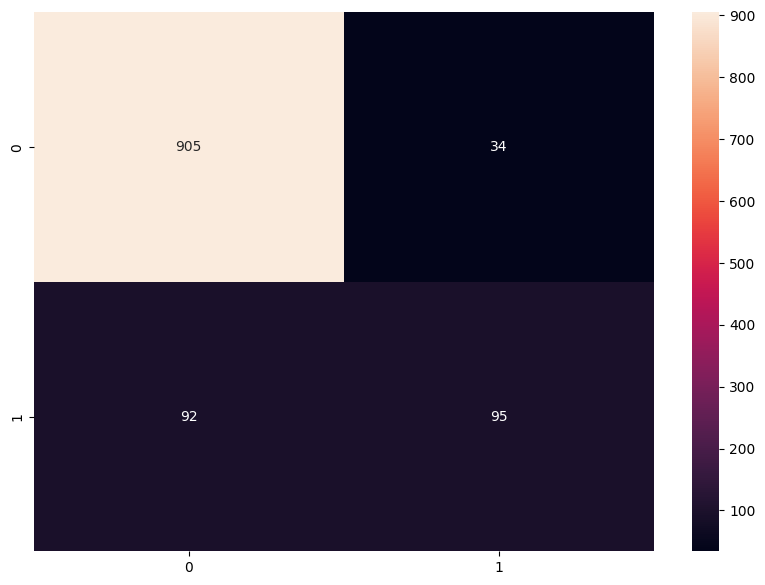

In [ ]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Build Decision tree model

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)

# Predicting test set
y_pred = tree.predict(X_test)

#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print("accuracy_score",accuracy_score(Y_test, y_pred))
print("precision_score",precision_score(Y_test, y_pred))
print("recall_score",recall_score(Y_test, y_pred))
print("f1_score",f1_score(Y_test, y_pred))

accuracy_score 0.9378330373001776
precision_score 0.8162162162162162
recall_score 0.8074866310160428
f1_score 0.8118279569892473


Test Data Accuracy: 0.9378


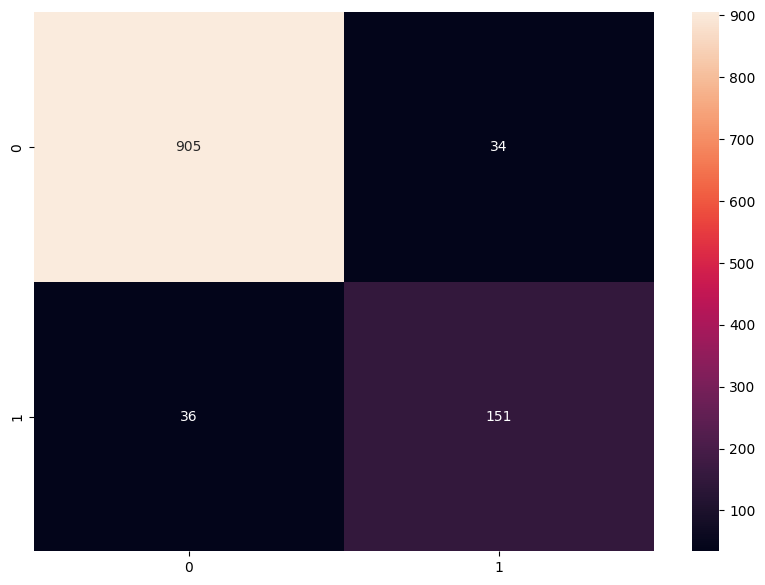

In [ ]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))